# Skillfactory. Курс "Специализация Data Science"
## Дипломный проект. Учебный кейс «Модель прогнозирования стоимости жилья для агентства недвижимости»

**Описание признаков в обработанном наборе данных:**
- 'status_ХХХ' — статус продажи
- 'propertyType_ХХХ' — тип объекта недвижимости
- 'baths' — количество ванных комнат
- 'sqft' — площадь в футах
- 'zipcode_label' — почтовый индекс
- 'beds' — количество спален
- 'state_label' — штат
- 'stories' — количество этажей
- 'private_pool_bool' - наличие бассейна
- 'fireplace_bool' — наличие камина
- 'last_renovation_year' - год постройки либо последней модернизации объекта
- 'heating_bool' - наличие системы отопления
- 'cooling_bool' - наличие системы кондиционирования
- 'parking_bool' - наличие парковки
- 'school_rating' - средний рейтинг школ вблизи объекта недвижимости
- 'school_distance' - минимальное рассотояние до школы от объекта недвижимости
____________________________
- **'target'** — цена объекта недвижимости (целевой признак, который необходимо спрогнозировать)

In [4]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
import pickle

In [5]:
df = pd.read_csv('data/data_cleaned_for_model.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273718 entries, 0 to 273717
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   baths                            273718 non-null  float64
 1   sqft                             273718 non-null  float64
 2   beds                             273718 non-null  float64
 3   stories                          273718 non-null  float64
 4   target                           273718 non-null  int64  
 5   private_pool_bool                273718 non-null  bool   
 6   fireplace_bool                   273718 non-null  bool   
 7   last_renovation_year             273718 non-null  float64
 8   heating_bool                     273718 non-null  bool   
 9   cooling_bool                     273718 non-null  bool   
 10  parking_bool                     273718 non-null  bool   
 11  school_rating                    273718 non-null  float64
 12  sc

### 3. Применение алгоритмов Machine Learning и оценка качества моделей

Для оценки качества моделирования будем использовать следующие метрики:  
- **MAE** - средняя абсолютная ошибка. Показывает насколько в среднем число в предсказании разошлось с реальным числом.
- **MAPE** - средняя абсолютная ошибка в процентах.
- **RMSE** - стандартное отклонение предсказаний от истинных ответов. 
- **R2** - коэффициент детерминации. Помогает понять, какую долю разнообразия смогла уловить модель в данных. 

In [6]:
# Разделим датафрейм на тренировочную и тестовую выборки
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Проверим размерности
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(218974, 27) (54744, 27) (218974,) (54744,)


In [7]:
# Функция для расчета метрик
def metrics_calculation(y_train, y_train_pred, y_test,y_test_pred):

    # Расчитываем метрики и выводим их на экран
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)*100
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)

    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)*100
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)

    print('\nMAE на тренировочной выборке: {:.2f} $'.format(mae_train))
    print('MAPE на тренировочной выборке: {:.2f} %'.format(mape_train))
    print('RMSE на тренировочной выборке: {:.2f} $'.format(rmse_train))
    print('r2 на тренировочной выборке: {:.2f}'.format(r2_train))
        
    print('\nMAE на тестовой выборке: {:.2f} $'.format(mae_test))
    print('MAPE на тестовой выборке: {:.2f} %'.format(mape_test))
    print('RMSE на тестовой выборке: {:.2f} $'.format(rmse_test))
    print('r2 на тестовой выборке: {:.2f}'.format(r2_test))

    # Полученные метрики
    return mae_train, mape_train, rmse_train, r2_train, mae_test, mape_test, rmse_test, r2_test

**1. Линейная регрессия Linear Regression**

In [8]:
# Обучаем модель линейной регрессии
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Выполняем предсказание
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# Выводим результаты
_ = metrics_calculation(y_train, y_train_pred, y_test, y_test_pred)


MAE на тренировочной выборке: 252871.91 $
MAPE на тренировочной выборке: 84.21 %
RMSE на тренировочной выборке: 407214.46 $
r2 на тренировочной выборке: 0.28

MAE на тестовой выборке: 251574.87 $
MAPE на тестовой выборке: 83.91 %
RMSE на тестовой выборке: 402193.85 $
r2 на тестовой выборке: 0.28


В результате обработки данных на этапе EDA нам удалось значительно улучшить значения метрик качества модели относительно baseline-решения. Абсолютная ошибка MAE уменьшилась более чем в 2 раза. Значения коэффициента детерминации r2 улучшены практически вдвое. Это говорит о том, что модель смогла уловить больше информации о зависимости (дисперсии) в данных. При этом не наблюдается переобучения модели, о чем свидетельствуют близкие значения метрик на тренировочной и тестовой выборках.

Тем не менее, значения метрик остаются на довольно низком уровне (для r2 удовлетворительным показателем считается показатель выше 0.5). Попробуем улучшить значения метрик, применяя более сложные алгоритмы машинного обучения.

**2. Полиномиальная регрессия Polynomial Regression**

Полиномиальная регрессия — это та же линейная регрессия, просто с новыми признаками.  Благодаря степенным слагаемым модель становится сложнее и начинает улавливать более сложные зависимости и выдавать меньшее смещение. Но при этом резко повышается риск переобучения модели — увеличивается разброс предсказаний на разных данных из-за количества факторов. Сгенерируем полиномиальные признаки 2-го порядка, чтобы проверить, сможет ли модель линейной регрессии лучше уловить закономерности в наших данных.

In [9]:
# Создаем объект класса PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

# Генерируем полиномиальные признаки
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Обучим модель линейной регрессии на полиномиальных признаках
lr_model_poly = LinearRegression()
lr_model_poly.fit(X_train_poly, y_train)

# Выполним предсказание и выведем результат
y_train_pred = lr_model_poly.predict(X_train_poly)
y_test_pred = lr_model_poly.predict(X_test_poly)

# Выведем значеня метрик с помощью написанной функции
_ = metrics_calculation(y_train, y_train_pred, y_test, y_test_pred)


MAE на тренировочной выборке: 201696.71 $
MAPE на тренировочной выборке: 61.81 %
RMSE на тренировочной выборке: 331737.24 $
r2 на тренировочной выборке: 0.52

MAE на тестовой выборке: 201852.69 $
MAPE на тестовой выборке: 62.00 %
RMSE на тестовой выборке: 329503.31 $
r2 на тестовой выборке: 0.52


Как видим, линейная регрессия на полиномиальных признаках дала нам значительный прирост метрик качества - уменьшены значения MAE, MAPE, RMSE. Показатель r2 превысил значение 0.5, что является удовлетворительным уровнем, и свидетельствует о том, что наша модель на 52% лучше предсказывает результат, чем простое предсказание средним.

**3. Полиномиальная регрессия Polynomial Regression с L1-регуляризацией**

Переобучения у нашей модели не наблюдается, тем не менее, попробуем провести L1-регуляризацию (Lasso) и сравнить результаты. Отличительной особенностью L1-регуляризации является то, что коэффициенты, которые соответствуют «ненужным», по мнению модели, факторам, обнуляются, то есть факторы просто не будут участвовать в предсказании. Тем самым мы уменьшим сложность модели, сократим её разброс и, как следствие, уменьшим переобучение.

In [10]:
# создем объект Lasso регрессии
lasso_lr_poly = Lasso(alpha = 0.1)
 
lasso_lr_poly.fit(X_train_poly, y_train)
 
y_train_pred_poly = lasso_lr_poly.predict(X_train_poly)
y_test_pred_poly = lasso_lr_poly.predict(X_test_poly)

# Выводим результаты
_ = metrics_calculation(y_train, y_train_pred_poly, y_test, y_test_pred_poly)


MAE на тренировочной выборке: 201696.29 $
MAPE на тренировочной выборке: 61.81 %
RMSE на тренировочной выборке: 331737.30 $
r2 на тренировочной выборке: 0.52

MAE на тестовой выборке: 201850.77 $
MAPE на тестовой выборке: 62.00 %
RMSE на тестовой выборке: 329501.38 $
r2 на тестовой выборке: 0.52


c:\Users\kkaza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.205e+16, tolerance: 5.032e+12
  model = cd_fast.enet_coordinate_descent(


Как видим, регуляризация не помогла в улучшении предсказаний, метрики оказались практически идентичными рассчитанным ранее. Делаем вывод, что регуляризацию целесообразно применять в случаях, когда наблюдается переобучение модели.

**4. Дерево решений Decision Tree**

Решающее дерево предсказывает значение целевой переменной с помощью применения последовательности простых решающих правил. Учитывая, что алгоритмы, основанные на деревьях решений, склонны к переобучению, нам необходимо подобрать оптимальные внешние параметры. Одним из основных параметров является **max depht** - максимально возможная длина от корня до самых дальних листьев (не включая корневую). Определим оптимальную глубину дерева и решим задачу регресии.


MAE на тренировочной выборке: 196537.63 $
MAPE на тренировочной выборке: 60.92 %
RMSE на тренировочной выборке: 325993.32 $
r2 на тренировочной выборке: 0.54

MAE на тестовой выборке: 198455.89 $
MAPE на тестовой выборке: 61.61 %
RMSE на тестовой выборке: 328556.83 $
r2 на тестовой выборке: 0.52

MAE на тренировочной выборке: 186812.21 $
MAPE на тренировочной выборке: 57.02 %
RMSE на тренировочной выборке: 312984.79 $
r2 на тренировочной выборке: 0.57

MAE на тестовой выборке: 189964.33 $
MAPE на тестовой выборке: 57.83 %
RMSE на тестовой выборке: 318895.53 $
r2 на тестовой выборке: 0.55

MAE на тренировочной выборке: 176398.26 $
MAPE на тренировочной выборке: 53.57 %
RMSE на тренировочной выборке: 299040.98 $
r2 на тренировочной выборке: 0.61

MAE на тестовой выборке: 181650.44 $
MAPE на тестовой выборке: 54.57 %
RMSE на тестовой выборке: 308987.92 $
r2 на тестовой выборке: 0.58

MAE на тренировочной выборке: 166015.70 $
MAPE на тренировочной выборке: 49.90 %
RMSE на тренировочной вы

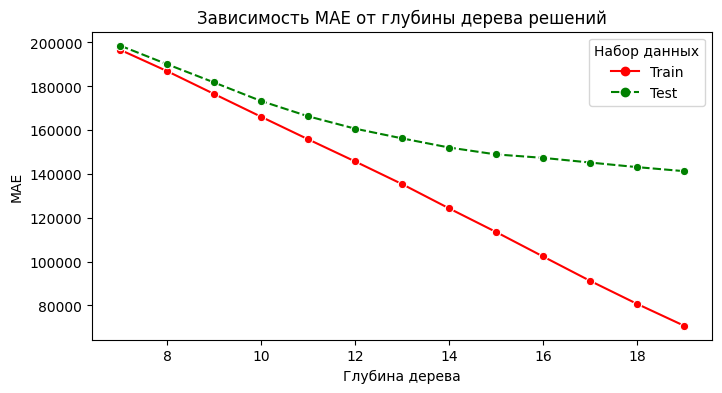

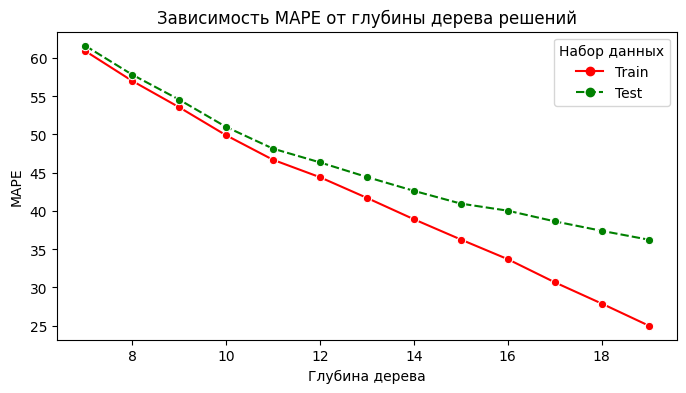

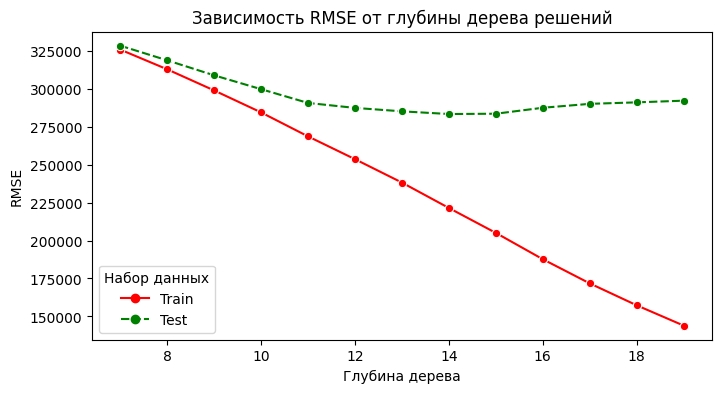

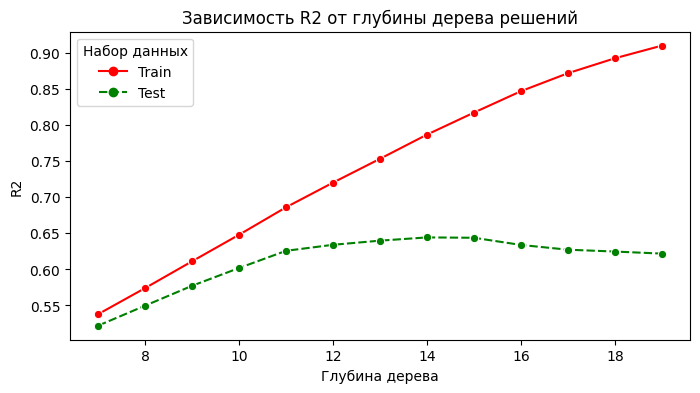

In [11]:
# Список значений глубины дерева
max_depths = list(np.arange(7, 20))

# Спиики для хранения значений метрик
mae_train_values = []
mae_test_values = []
mape_train_values = []
mape_test_values = []
rmse_train_values = []
rmse_test_values = []
r2_train_values = []
r2_test_values = []

# Обучаем решающее дерево для каждого значения глубины и сохраняем результаты
for depth in max_depths:
    # Создаем объект модели решающего дерева с максимальной глубиной max_depth
    tree_regressor = DecisionTreeRegressor(
        max_depth = depth,
        random_state = 42)

    # Обучаем модель на тренировочной выборке
    tree_regressor.fit(X_train, y_train)

    # Получаем прогнозы на обучающей и тестовой выборках
    y_train_pred = tree_regressor.predict(X_train)
    y_test_pred = tree_regressor.predict(X_test)
    
    # Рассчитываем метрики качества
    mae_train, mape_train, rmse_train, r2_train, mae_test, mape_test, rmse_test, r2_test\
        = metrics_calculation(y_train, y_train_pred, y_test, y_test_pred)

    # Добавляем значения метрик в списки
    mae_train_values.append(mae_train)
    mae_test_values.append(mae_test)
    mape_train_values.append(mape_train)
    mape_test_values.append(mape_test)
    rmse_train_values.append(rmse_train)
    rmse_test_values.append(rmse_test)
    r2_train_values.append(r2_train)
    r2_test_values.append(r2_test)


# Преобразуем получившиеся списки в датафреймы
df_mae = pd.DataFrame(
    data = {'Train': mae_train_values,
            'Test': mae_test_values},
    index = max_depths)

df_mape = pd.DataFrame(
    data = {'Train': mape_train_values,
            'Test': mape_test_values},
    index = max_depths)

df_rmse = pd.DataFrame(
    data = {'Train': rmse_train_values,
            'Test': rmse_test_values},
    index = max_depths)

df_r2 = pd.DataFrame(
    data = {'Train': r2_train_values,
            'Test': r2_test_values},
    index = max_depths)

# Выводим график зависимости MAE
fig = plt.figure(figsize=(8, 4))
lineplot = sns.lineplot(
    data = df_mae,
    markers=["o", "o"],
    palette=['r', 'g']
);
lineplot.set_title('Зависимость MAE от глубины дерева решений');
lineplot.set_ylabel('MAE');
lineplot.set_xlabel('Глубина дерева');
lineplot.legend(title ='Набор данных');

# Выводим график зависимости MAPE
fig = plt.figure(figsize=(8, 4))
lineplot = sns.lineplot(
    data = df_mape,
    markers=["o", "o"],
    palette=['r', 'g']
);
lineplot.set_title('Зависимость MAPE от глубины дерева решений');
lineplot.set_ylabel('MAPE');
lineplot.set_xlabel('Глубина дерева');
lineplot.legend(title ='Набор данных');

# Выводим график зависимости RMSE
fig = plt.figure(figsize=(8, 4))
lineplot = sns.lineplot(
    data = df_rmse,
    markers=["o", "o"],
    palette=['r', 'g']
);
lineplot.set_title('Зависимость RMSE от глубины дерева решений');
lineplot.set_ylabel('RMSE');
lineplot.set_xlabel('Глубина дерева');
lineplot.legend(title ='Набор данных');

# Выводим график зависимости R2
fig = plt.figure(figsize=(8, 4))
lineplot = sns.lineplot(
    data = df_r2,
    markers=["o", "o"],
    palette=['r', 'g']
);
lineplot.set_title('Зависимость R2 от глубины дерева решений');
lineplot.set_ylabel('R2');
lineplot.set_xlabel('Глубина дерева');
lineplot.legend(title ='Набор данных');

По графикам видно, что коэффициент детерминации r2 на тестовой выборке достигает наилучших значений при глубине дерева 14-15. Аналогичным образом ведет себя показатель RMSE. Показатели MAE и MAPE плавно улучшаются с увеличением глубины. При этом на тренировочной выборке все показатели практически линейно улучшаются с увеличением глубины дерева, что свидетельствует о переобучении модели.

Произведем обучение дерева решений с максимальной глубиной max_depth=15 и минимальным числом объектов в листе min_samples_leaf=8.

In [14]:
# Метрики при оптимальной глубине решающего дерева
max_depth_best=15
print('MAE: {:.2f} $'.format(mae_test_values[max_depths.index(max_depth_best)]))
print('MAPE: {:.2f} %'.format(mape_test_values[max_depths.index(max_depth_best)]))
print('RMSE: {:.2f} $'.format(rmse_test_values[max_depths.index(max_depth_best)]))
print('R2: {:.2f}'.format(r2_test_values[max_depths.index(max_depth_best)]))

MAE: 148850.74 $
MAPE: 40.96 %
RMSE: 283654.47 $
R2: 0.64


In [15]:
# Создаем модель дерева решений с оптимальной глубиной решающего дерева
tree_regressor = DecisionTreeRegressor(
    max_depth = 15,
    min_samples_leaf = 8,
    random_state = 42)

# Обучаем модель
tree_regressor.fit(X_train, y_train)

# Выполняем предсказание
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

# Вычисляем метрики качества
_ = metrics_calculation(y_train, y_train_pred, y_test, y_test_pred)


MAE на тренировочной выборке: 129366.08 $
MAPE на тренировочной выборке: 37.82 %
RMSE на тренировочной выборке: 232250.92 $
r2 на тренировочной выборке: 0.77

MAE на тестовой выборке: 148394.57 $
MAPE на тестовой выборке: 40.85 %
RMSE на тестовой выборке: 272860.24 $
r2 на тестовой выборке: 0.67


Таким образом, использовав алгоритм решающего дерева с заданными параметрами, мы смогли улучшить значения всех метрик относительно алгоритмов линейной регресии как на тренировочной, так и на тестовой выборках.

**5. Случайный лес Random Forest**

Случайный лес относится к ансамблевым моделям и является реализацией бэггинга, основанной на использовании в качестве базовой модели дерева решений. Оптимизацию гиперпараметров модели случайного леса будем производить с помощью метода RandomizedSearchCV.
Данный метод позволяет выбирать n случайных комбинаций из заданных нами последовательностей. Как следствие,  перебираются не все возможные комбинации, а только часть из них, тем самым обеспечивая более эффективную и быструю работу.

In [16]:
# Создаем сетку гиперпараметров
param_grid = {
    'n_estimators': [80, 200, 30],
    'max_depth': list(np.linspace(20, 40, 10, dtype=int)),
    'min_samples_leaf': [5, 10, 15]
    }

# Создаем модель RandomizedSearchCV на основе RandomForestRegressor
random_search_forest = RandomizedSearchCV(
    estimator = RandomForestRegressor(random_state = 42),
    param_distributions = param_grid,
    cv=5,
    n_iter = 10, 
    n_jobs = -1
)

# Обучаем модель
random_search_forest.fit(X_train, y_train)

# Выполняем предсказание
y_train_pred = random_search_forest.predict(X_train)
y_test_pred = random_search_forest.predict(X_test)

# Вычисляем метрики качества
_ = metrics_calculation(y_train, y_train_pred, y_test, y_test_pred)


MAE на тренировочной выборке: 83259.75 $
MAPE на тренировочной выборке: 20.98 %
RMSE на тренировочной выборке: 177329.22 $
r2 на тренировочной выборке: 0.86

MAE на тестовой выборке: 116548.07 $
MAPE на тестовой выборке: 29.49 %
RMSE на тестовой выборке: 234038.52 $
r2 на тестовой выборке: 0.76


In [17]:
# Выводим оптимальные значения гиперпараметров
print('Наилучшие значения гиперпараметров:', random_search_forest.best_params_)

Наилучшие значения гиперпараметров: {'n_estimators': 200, 'min_samples_leaf': 5, 'max_depth': 31}


Оптимизация гиперпараметров RandomizedSearchCV для алгоритма случайного леса позволила нам добиться значительного улучшения всех метрик качества модели. Довольно высокие результаты объясняются сложностью модели, требуя при этом бОльших временных затрат и вычислительных мощностей.

**6. Градиентный бустинг Gradient Boosting**

Бустинг относится к продвинутым методам машинного обучения и представляет собой алгоритм построения ансамбля, основанный на последовательном построении слабых моделей, причём каждая новая модель пытается уменьшить ошибку предыдущей. После того как все модели обучены, они объединяются в композицию.

Градиентный бустинг строит композицию из своих базовых моделей, подбирая их оптимальным образом на основе принципа градиентных методов оптимизации. Каждый последующий алгоритм улучшает предыдущий, при этом используя информацию о функции потерь для построения нового алгоритма. Такой подход позволяет значительно ускорить процесс последовательного построения ансамбля и добиться лучшего качества за счет меньшего количества моделей в ансамбле.

Для нашей задачи регресии мы будем использовать градиентный бустинг над деревьями решений, реализованный в классе GradientBoostingRegressor. Используем такое же количество базовых моделей (деревьев в бустинге), как и в предыдущем алгоритме, и сравним результаты.

In [18]:
# Обучаем модель градиентного бустинга
gb_regressor = GradientBoostingRegressor(
    learning_rate = 0.1,
    n_estimators = 200,
    max_depth = 15,
    min_samples_leaf = 10,
    random_state = 42
)
gb_regressor.fit(X_train, y_train)

# Выполняем предсказание
y_train_pred = gb_regressor.predict(X_train)
y_test_pred = gb_regressor.predict(X_test)

# Выводим результаты
_ = metrics_calculation(y_train, y_train_pred, y_test, y_test_pred)


MAE на тренировочной выборке: 59020.00 $
MAPE на тренировочной выборке: 17.37 %
RMSE на тренировочной выборке: 123572.12 $
r2 на тренировочной выборке: 0.93

MAE на тестовой выборке: 105483.29 $
MAPE на тестовой выборке: 26.63 %
RMSE на тестовой выборке: 214953.12 $
r2 на тестовой выборке: 0.80


Модель градиентного бустинга показала результаты лучше, чем модель случайного леса, при том же количестве деревьев. Высокий показатель r2 на тренировочной выборке говорит о склонности модели к переобучению. Всегда важно помнить, что зависимость качества ансамбля от количества моделей является нелинейной. При большом количестве моделей градиентный бустинг может уходить в переобучение, тем самым ухудшая метрики на тестовой выборке.

Сведем результаты нашего моделирования в таблицы и сравним между собой и с baseline-решением.

In [19]:
metric_pivot = {'Metric Baseline': ['LinearRegression', 'Gradient Boosting'],
        'MAE, $': [575064.84, 373626.53],
        'MAPE, %': [2506.07, 1567.36],
        'RMSE, $': [1707794.48, 1417970.55],
        'r2': [0.16, 0.42]}

df_metrics = pd.DataFrame(metric_pivot)
df_metrics

,Metric Baseline,"MAE, $","MAPE, %","RMSE, $",r2
0,LinearRegression,575064.84,2506.07,1707794.48,0.16
1,Gradient Boosting,373626.53,1567.36,1417970.55,0.42


In [20]:
metric_pivot = {'Metric Model': ['LinearRegression', 'Polynomial Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
        'MAE, $': [251574.87, 201852.69, 148394.57, 117658.58, 105483.29],
        'MAPE, %': [83.91, 62.00, 40.85, 30.24, 26.63],
        'RMSE, $': [402193.85, 329503.31, 272860.24, 234444.65, 214953.12],
        'r2': [0.28, 0.52, 0.67, 0.76, 0.80]}

df_metrics = pd.DataFrame(metric_pivot)
df_metrics

,Metric Model,"MAE, $","MAPE, %","RMSE, $",r2
0,LinearRegression,251574.87,83.91,402193.85,0.28
1,Polynomial Regression,201852.69,62.00,329503.31,0.52
2,Decision Tree,148394.57,40.85,272860.24,0.67
3,Random Forest,117658.58,30.24,234444.65,0.76
4,Gradient Boosting,105483.29,26.63,214953.12,0.80


Результаты baseline-решения значительно улучшены, в этом нам помогла обработка данных на этапе EDA и подбор гиперпараметров на этапе моделирования.

Исходя из полученных результатов можно сделать вывод, что применение более продвинутых и гибких моделей приводит к повышению значений метрик качества и, как следствие, более точному прогнозированию.

Самый выской результат показала модель градиентного бустинга, именно она будет использована для внедрения в продакшен.

**Подготовка модели к продакшену**

Проведем сериализацию модели и сохранение в файл с помощью библиотеки pickle, восстановим обученную модель из файла и убедимся, что методы и результаты предсказаний обученной модели и модели, загруженной из файла, совпадают. Далее подадим в десериализованную модель тестовый датасет и проверим результаты моделирования.

In [21]:
# Производим сериализацию модели и сохраняем ее в файл формата pkl
with open('web/app/models/model.pkl', 'wb') as output:
    pickle.dump(gb_regressor, output)

In [22]:
# Производим десериализацию и извлекаем модель из файла формата pkl
with open('web/app/models/model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [23]:
# Проверяем, что все элементы массивов предсказаний совпадают между собой
print(all(gb_regressor.predict(X_train) == loaded_model.predict(X_train)))
print(all(gb_regressor.predict(X_test) == loaded_model.predict(X_test)))

True
True


In [24]:
# Создадим тестовый датасет
data = [
    (3, 2000, 0, 0, 0, 0, 1900, 0, 0, 0, 5.3, 5.2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 238),
    (5, 5000, 4, 6, 1, 1, 2022, 1, 1, 1, 9.5, 1.8, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 9, 154),
    (1, 1000, 2, 3, 1, 0, 1978, 1, 0, 0, 3.1, 10.2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 37, 1022)
]

columns = ['baths', 'sqft', 'beds', 'stories', 'private_pool_bool', 'fireplace_bool',
           'last_renovation_year', 'heating_bool', 'cooling_bool', 'parking_bool',
           'school_rating', 'school_distance',
           'status_Active', 'status_For Sale', 'status_Foreclosure',
           'status_New construction', 'status_Other', 'status_Pending',
           'propertyType_Condo', 'propertyType_Land', 'propertyType_Multi Family Home',
           'propertyType_Other', 'propertyType_Single Family Home', 'propertyType_Townhouse',
           'propertyType_Traditional', 'state_label', 'zipcode_label']

df_test = pd.DataFrame(data, columns=columns)

df_test.head()

,baths,sqft,beds,stories,private_pool_bool,fireplace_bool,last_renovation_year,heating_bool,cooling_bool,parking_bool,...,status_Pending,propertyType_Condo,propertyType_Land,propertyType_Multi Family Home,propertyType_Other,propertyType_Single Family Home,propertyType_Townhouse,propertyType_Traditional,state_label,zipcode_label
0,3,2000,0,0,0,0,1900,0,0,0,...,0,0,0,0,0,0,0,0,0,238
1,5,5000,4,6,1,1,2022,1,1,1,...,1,0,1,0,0,1,1,1,9,154
2,1,1000,2,3,1,0,1978,1,0,0,...,1,1,1,1,0,0,1,0,37,1022


In [25]:
# Выполняем предсказание с помощью загруженной модели
prediction = loaded_model.predict(df_test)

# Выводим результат на экран для проверки при запуске на сервере
for i in range(prediction.shape[0]):
    print('Прогноз стоимости объекта недвижимости:', round(prediction[i]))

Прогноз стоимости объекта недвижимости: 2319227
Прогноз стоимости объекта недвижимости: 2675413
Прогноз стоимости объекта недвижимости: 1852651


Как видно, исходная и восстановленная из файла модели дают одинаковые предсказания. На основании тестового датасета загруженная модель выдает прогноз стоимости объекта недвижимости. Это значит, что теперь можно импортировать нашу обученную модель в любое Python-приложение и пользоваться им, минуя этап обучения и все этапы, предшествующие ему.

Для деплоя модели при помощи фреймворка Flask был написан веб-сервис web/app/server.py, который позволяет делать запросы к нашей модели и в ответ на запрос получать ответы — предсказания модели. При помощи Docker был создан образ веб-сервиса sf_diplom_image и произведена контейнеризация. Запуск контейнера производится командой:

**docker run -it --rm --name=sf_diplom_container -p=5000:5000 sf_diplom_image**

Проверка работы веб-сервиса производится запуском клиентского приложения web/app/test/client.py.

В результате выполнения скрипта возвращается код 200 и выводится сообщение с предсказанием модели. Таким образом, Flask-приложение запущено в контейнере, и к нему можно делать запросы.

**Работа над проектом завершена. Поставленная задача разработки веб-сервиса предсказания стоимости недвижимости на основе данных об объекте успешно выполнена.**